# DRAFT: Accessing ICESat-2 Data

This notebook covers ICESat-2 data query and access from the NASA NSIDC DAAC (NASA National Snow and Ice Data Center Distributed Active Archive Center). Specifically, it illustrates a recommended pathway to obtain data programmatically using the Python library `icepyx`.

#### Credits
* notebook by: Jessica Scheick and Amy Steiker
* source material: [NSIDC DAAC data access with icepyx](https://github.com/icesat2py/icepyx/blob/master/doc/examples/ICESat-2_DAAC_DataAccess_Example.ipynb) by Jessica Scheick


## Objectives

(draft)
* big data landscape
* programmatic ICESat-2 data access

## Tutorial Setup

Open a terminal in Jupyterlab ("+" icon in upper left corner, then click on the terminal icon)

1. Navigate to local directory where you want to store tutorial material:  
`cd ~`

2. Clone the repo:  
`git clone https://github.com/ICESAT-2HackWeek/data-access.git`

3. Enter the tutorial directory:  
`cd data-access`

## Motivation and Background

On Friday, we explored various options for data access and visualization. Specifically, we spent some time using OpenAltimetry to interactively discover and graph data. But now we're ready to access the data directly and conduct our own analysis on it. This calls for a programmatic way to obtain our datasets and get them into our analysis environment. Although there are many ways to do this, here we are going to show examples using `icecpyx`.

`icepyx` is a wrapper on top of the NSIDC API, created specifically to make programmatic access to ICESat-2 data easier. The library is open-source, community developed and driven, and was created in response to user challenges faced at the 2019 ICESat-2 Hackweek. Under continuous development, we think you'll find `icepyx` a useful resource and encourage you to contribute your ideas, code, and feedback. We hope that this year's Hackweek expands our ICESat-2 data-user community and sparks future feature development, both through hacking projects and beyond.

***Jessica comment*** too wordy? Should we put the image of data access options in here again as a reminder/roadmap?

## NSIDC DAAC Programmatic Data Access using icepyx

### Import packages, including icepyx

In [2]:
from icepyx import icesat2data as ipd
import os
import shutil
%matplotlib inline

DRAFT ONLY: Remove the next two cells once the notebook is developed/tested

In [3]:
%cd ./../

/home/jovyan/data-access


In [4]:
%load_ext autoreload
from icepyx import icesat2data as ipd
%autoreload 2
#in order to use "as ipd", you have to use autoreload 2, which will automatically reload any module not excluded by being imported with %aimport -[module]

### Key Steps for Programmatic Data Access

There are several key steps for accessing data from the NSIDC API:
1. Define your parameters (spatial, temporal, dataset, etc.)
2. Query the NSIDC API to find out more information about the dataset.
3. Log in to NASA Earthdata
4. Define additional parameters (e.g. subsetting/customization options) (Tuesday's tutorial)
***AMY COMMENT:***
Isn't this entire tutorial taking place on Monday or did I miss a third opportunity for teaching data access? The subsetting portion is currently scheduled for the last 10-15 minutes of the data filtering tutorial (Johan Neilson). We were trying to keep the schedule itself simpler, but it might be a good idea to just formally break this out on the schedule for clarity.

5. Order your data
6. Download your data

We'll go through each of these steps during this tutorial, at the end summarizing how `icepyx` streamlines this process into a minimal number of lines of code.

### Step 1: Create an ICESat-2 data object with the desired search parameters

There are three required inputs:
- `short_name` = the dataset of interest, known as its "short name".
See https://nsidc.org/data/icesat-2/data-sets for a list of the available datasets. Dataset shortnames, or IDs, can also be found at the top of each individual dataset landing page on NSIDC's website.

- `spatial extent` = a region of interest to search within. This can be entered as a bounding box, polygon vertex coordinate pairs, or a polygon geospatial file (currently shp, kml, and gpkg are supported, though gpkg is still untested).
    - bounding box: Given in decimal degrees for the lower left longitude, lower left latitude, upper right longitude, and upper right latitude. West longitudes and south latitudes should be provided as negative degrees.
    - polygon vertices: Given as longitude, latitude coordinate pairs of decimal degrees with the last entry a repeat of the first.
    - polygon file: A string containing the full file path and name.
- `date_range` = the date range for which you would like to search for results. Must be formatted as a set of 'YYYY-MM-DD' strings. 

There are also several optional inputs to allow the user finer control over their search.
- `start_time` = start time to search for data on the start date. If no input is given, this defaults to 00:00:00.
- `end_time` = end time for the end date of the temporal search parameter. If no input is given, this defaults to 23:59:59. Times must be input as 'HH:mm:ss' strings.
- `version` = What version of the dataset to use, input as a numerical string. If no input is given, this value defaults to the most recent version of the dataset specified in `short_name`.

*IMPORTANT NOTES* 
***AMY COMMENT:*** Do we want to clarify that this is a filter based on overlapping granule metadata? This could help with the understanding of filtering vs subsetting and to explain the overestimation of spatial coverage in a lot of cases. 
- The spatial extent is a required input for data access. Much like your spatial extent in OpenAltimetry showed which granules were available, this input provides an easy way for the NSIDC API to search through the ICESat-2 metadata and determine which granules *might* have some coverage there (without having to open all the individual granules, which would take a lot of computing resources). Then, this same spatial region will be used a second time to actually extract the data for the region you're interested in (which is why you might get a message during ordering saying a given granule didn't have any data in your region of interest).
- Version 001 is used as an example in the below cell to illustrate the warning issued by not using the most recent version. However, using it will cause 'no results' errors in granule ordering for some search parameters. These issues have been resolved in later versions of the datasets, so it is best to use the most recent version where possible. We will re-initialize `region_a` in a later cell to use for the rest of this notebook.

In [1]:
region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range, \
                           start_time='03:30:00', end_time='21:30:00', version='001')

print(region_a.dataset)
print(region_a.dates)
print(region_a.start_time)
print(region_a.end_time)
print(region_a.dataset_version)
print(region_a.spatial_extent)

NameError: name 'ipd' is not defined

Below are examples of multiple spatial extent inputs, which provide the code to download the data used throughout the Hackweek. Although you may choose to run any of the locations in the next three cells, we will be using ____.

In [ ]:
#Byrd Glacier/Ross Ice Shelf
short_name = 'ATL06'
spatial_extent = [148, -81, 162, -80]
date_range = ['2018-10-14','2018-12-22']

In [ ]:
#Arctic Ocean
short_name = 'ATL07'
spatial_extent = [0, 80, 180, 90]
date_range = ['2019-02-01','2019-03-01']

In [5]:
#Northwest Continental US
short_name = 'ATL06'
spatial_extent = [-125, 40, -120, 50]
date_range = ['2019-06-01','2019-07-01']

Create the data object using our inputs

In [6]:
region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range)

/srv/icesat2py/icepyx/icepyx/core/icesat2data.py:115: UserWarning: Please note: as of 2020-05-05, a major reorganization of the core icepyx.icesat2data code may result in errors produced by now depricated functions. Please see our documentation pages or example notebooks for updates.
  warnings.warn("Please note: as of 2020-05-05, a major reorganization of the core icepyx.icesat2data code may result in errors produced by now depricated functions. Please see our documentation pages or example notebooks for updates.")


***AMY COMMENT:*** I'm sure you'll explain this as you run this line but may be worth adding some context on the changes to icepyx (ignore if you've never used it before, etc.)

***Jessica Comment*** it's actually on my to-do list to remove the comment before the hackweek. Most people started using it after these changes anyway, so this was for the benefit of anyone using it right when I made the switch (and most of those people were helping with the change anyway!)

Is the below now too "out of order" in terms of explanation? I moved the input parameters and version warning example above it...

Formatted parameters and function calls allow us to see the the properties of the data object we have created.

ATL06
['2019-06-01', '2019-07-01']
00:00:00
23:59:59
003
['bounding box', [-125, 40, -120, 50]]


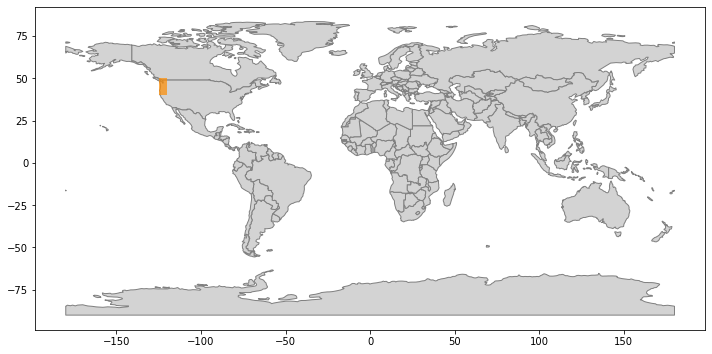

In [7]:
print(region_a.dataset)
print(region_a.dates)
print(region_a.start_time)
print(region_a.end_time)
print(region_a.dataset_version)
print(region_a.spatial_extent)
region_a.visualize_spatial_extent()

Alternatively, you can also just create the data object without creating named variables first:

In [ ]:
# region_a = ipd.Icesat2Data('ATL06',[-55, 68, -48, 71],['2019-02-01','2019-02-28'], \
#                            start_time='00:00:00', end_time='23:59:59', version='002')

#### Built in methods allow us to get more information about our dataset
In addition to viewing the stored object information shown above (e.g. dataset, start and end date and time, version, etc.), we can also request summary information about the dataset itself or confirm that we have manually specified the latest version.

In [17]:
region_a.dataset_summary_info()
print(region_a.latest_version())

dataset_id :  ATLAS/ICESat-2 L3A Land Ice Height V003
short_name :  ATL06
version_id :  003
time_start :  2018-10-14T00:00:00.000Z
coordinate_system :  CARTESIAN
summary :  This data set (ATL06) provides geolocated, land-ice surface heights (above the WGS 84 ellipsoid, ITRF2014 reference frame), plus ancillary parameters that can be used to interpret and assess the quality of the height estimates. The data were acquired by the Advanced Topographic Laser Altimeter System (ATLAS) instrument on board the Ice, Cloud and land Elevation Satellite-2 (ICESat-2) observatory.
orbit_parameters :  {'swath_width': '36.0', 'period': '94.29', 'inclination_angle': '92.0', 'number_of_orbits': '0.071428571', 'start_circular_latitude': '0.0'}
003


If the summary does not provide all of the information you are looking for, or you would like to see information for previous versions of the dataset, all available metadata for the collection dataset is available in a readable format.

In [18]:
region_a.dataset_all_info()

{'feed': {'entry': [{'archive_center': 'NASA NSIDC DAAC',
                     'associations': {'services': ['S1568899363-NSIDC_ECS',
                                                   'S1613689509-NSIDC_ECS',
                                                   'S1613669681-NSIDC_ECS']},
                     'boxes': ['-90 -180 90 180'],
                     'browse_flag': False,
                     'coordinate_system': 'CARTESIAN',
                     'data_center': 'NSIDC_ECS',
                     'dataset_id': 'ATLAS/ICESat-2 L3A Land Ice Height V001',
                     'has_formats': True,
                     'has_spatial_subsetting': True,
                     'has_temporal_subsetting': True,
                     'has_transforms': False,
                     'has_variables': True,
                     'id': 'C1511847675-NSIDC_ECS',
                     'links': [{'href': 'https://n5eil01u.ecs.nsidc.org/ATLAS/ATL06.001/',
                                'hreflang': 'en-US',
 

### Step 2: Querying a dataset
In order to search the dataset collection for available data granules, we need to build our search parameters. This is done automatically behind the scenes when you run `region_a.avail_granules()`, but you can also build and view them by calling `region_a.CMRparams`. These are formatted as a dictionary of key:value pairs according to the CMR documentation.

*What is CMR?*
The Common Metadata Repository (CMR) is a high-performance, high-quality, continuously evolving metadata system that catalogs Earth Science data and associated service metadata records. These metadata records are registered, modified, discovered, and accessed through programmatic interfaces leveraging standard protocols and APIs. Note that not all NSIDC data can be searched at the file level using CMR, particularly those outside of the NASA DAAC program.

CMR API documentation: https://cmr.earthdata.nasa.gov/search/site/docs/search/api.html

*What are granules?*
"Granules" are essentially data files with specific bounds. You can think of a granule as a snapshot in space and time, where each granule is stored in an individual file. In order to cover a large geographic area or have multiple snapshots in time, you would need to combine (mosaic) and/or compare multiple granules/files worth of data. Data storage and access using some of the other formats and tools described throughout this Hackweek (`Zarr`, `XArray`, `Dask`) are specifically designed to alleviate the problems introduced to cloud and parallel computing by virtue of the data being stored in granule/file-type pieces.

***AMY COMMENT:*** We get questions all the time about what a granule is (I am sure you have asked this question yourself at some point!). We try to steer away from this term and simply say "file" instead to avoid confusion, but people who are much more familiar with NASA data are comfortable with the term. If you want, I can go through and replace granule with file to avoid confusion, or we could just explain what that term means. I think plenty of other tutorial leads will use that term so maybe it's not a big deal to keep using it though!
***Jessica Comment*** I added some explanation, but we can go through and change granule to file if you think that helps. My concern is that muddies the waters for granule versus subsetted granule, because both are downloaded as "files".

In [19]:
#build and view the parameters that will be submitted in our query
region_a.CMRparams

{'short_name': 'ATL06',
 'version': '003',
 'temporal': '2019-06-01T03:30:00Z,2019-07-01T21:30:00Z',
 'bounding_box': '-125,40,-120,50'}

Now that our parameter dictionary is constructed, we can search the CMR database for the available granules. Granules returned by the CMR metadata search are automatically stored within the data object. Recall the search completed at this level relies completely on the granules' metadata. As a result, some (and in rare cases all) of the granules returned may not actually contain data in your specified region, particularly if the region is small or located near the boundaries of a given granule. If this is the case, the subsetter will not return any data when you actually place the order. A warning message will be issued during ordering for each granule to which this applies (but no message is output for successfully subsetted granules, so don't worry!)

In [1]:
#search for available granules and provide basic summary info about them
region_a.avail_granules()

NameError: name 'region_a' is not defined

In [ ]:
#get a list of the available granule IDs that meet your search criteria
region_a.avail_granules(ids=True)

In [21]:
#print detailed information about the returned search results
region_a.granules.avail


[{'producer_granule_id': 'ATL06_20190602004919_09890306_003_01.h5',
  'time_start': '2019-06-02T00:49:18.000Z',
  'orbit': {'ascending_crossing': '63.97913212176996',
   'start_lat': '59.5',
   'start_direction': 'D',
   'end_lat': '27',
   'end_direction': 'D'},
  'updated': '2020-05-04T15:47:50.623Z',
  'orbit_calculated_spatial_domains': [{'equator_crossing_date_time': '2019-06-02T00:17:47.839Z',
    'equator_crossing_longitude': '63.97913212176996',
    'orbit_number': '3964'}],
  'dataset_id': 'ATLAS/ICESat-2 L3A Land Ice Height V003',
  'data_center': 'NSIDC_ECS',
  'title': 'SC:ATL06.003:178135911',
  'coordinate_system': 'ORBIT',
  'time_end': '2019-06-02T00:52:00.000Z',
  'id': 'G1726169217-NSIDC_ECS',
  'original_format': 'ISO-SMAP',
  'granule_size': '11.4610204697',
  'browse_flag': True,
  'polygons': [['59.5979414453054 -120.16712265508676 49.31089776079679 -121.99852522812998 49.32824133398362 -122.49477169430004 59.620288355717484 -120.80592240035871 59.5979414453054 -1

### Step 3: Log in to NASA Earthdata

In order to download any data from NSIDC, we must first authenticate ourselves using a valid Earthdata login. This will start an active logged-in session to enable data download. Once you have successfully logged in for a given icesat2data instance, the session will be passed behind the scenes as needed for you to order and download data. Passwords are entered but not shown or stored in plain text by the system.

***AMY COMMENT:*** Tokens are no longer needed as long as you create a valid HTTP session based on your Earthdata Login credentials. 
***Jessica comment*** Good to know - I think I may have accidentally stopped submitting one behind the scenes but didn't get an error so never noticed! Either way, I'll take it out of the note here and eventually we should make sure it's out of the code too.

In [ ]:
earthdata_uid = 'icepyx_devteam'
email = 'icepyx.dev@gmail.com'
region_a.earthdata_login(earthdata_uid, email)

In [22]:
earthdata_uid = 'amy.steiker'
email = 'amy.steiker@nsic.org'
region_a.earthdata_login(earthdata_uid, email)

Earthdata Login password:  ·········


### Step 4: Additional Parameters

Once we have generated our session, we must build the required configuration parameters needed to actually download data. These will tell the system how we want to download the data. As with the CMR search parameters, these will be built automatically when you run `region_a.order_granules()`, but you can also create and view them with `region_a.reqparams`. The default parameters, given below, should work for most users.
- `page_size` = 10. This is the number of granules we will request per order.
- `page_num` = 1. Determine the number of pages based on page size and the number of granules available. If no page_num is specified, this calculation is done automatically to set page_num, which then provides the number of individual orders we will request given the number of granules.
- `request_mode` = 'async'
- `agent` = 'NO'
- `include_meta` = 'Y'

#### More details about the configuration parameters
`request_mode` is "synchronous" by default, meaning that the request relies on a direct, continous connection between you and the API endpoint. Outputs are directly downloaded, or "streamed", to your working directory. For this tutorial, we will set the request mode to asynchronous, which will allow concurrent requests to be queued and processed without the need for a continuous connection.

**Use the streaming `request_mode` with caution: While it can be beneficial to stream outputs directly to your local directory, note that timeout errors can result depending on the size of the request, and your request will not be queued in the system if NSIDC is experiencing high request volume. For best performance, NSIDC recommends setting `page_size=1` to download individual outputs, which will eliminate extra time needed to zip outputs and will ensure faster processing times per request.**


Recall that we queried the total number and volume of granules prior to applying customization services. `page_size` and `page_num` can be used to adjust the number of granules per request up to a limit of 2000 granules for asynchronous, and 100 granules for synchronous (streaming). For now, let's select 9 granules to be processed in each zipped request. For ATL06, the granule size can exceed 100 MB so we want to choose a granule count that provides us with a reasonable zipped download size. 

***AMY COMMENT:*** Can icepyx loop through multiple >2000 granule requests? May just be worth mentioning that it's possible to access bulk orders but these would have to be done in multiple 2000-granule chunks. I added this functionality to the nsidc notebook since last year's Hackweek: https://github.com/nsidc/NSIDC-Data-Access-Notebook
***Jessica comment*** the short answer is no - currently icepyx will not break up granule requests that are >2000 (so I'm assuming the subsetter would just return an error?). I will add this to my list of things to add/improve/update in the code and see if we can't get there before the HW. Zheng just put together some code to pick up on interrupted downloads, which I'm super excited to incorporate and will likely be helpful here! There are also a few other bugs with manually setting parameters I'm working on as well.

In [23]:
print(region_a.reqparams)
# region_a.reqparams['page_size'] = 9
# print(region_a.reqparams)

{'page_size': 10, 'page_num': 2}


#### Additional Parameters: Subsetting (more details provided on Tuesday)

In addition to the required parameters (CMRparams and reqparams) that are submitted with our order, for ICESat-2 datasets we can also submit subsetting and reformatting parameters to NSIDC. This utilizes the NSIDC's built in subsetter to extract only the data you are interested (spatially, temporally, variables of interest, etc.). The advantages of using the NSIDC's subsetter include:
* easily reproducible downloads, particularly when coupled with an icepyx data object
* smaller file size, meaning faster downloads, less storage required, and no need to subset the data on your own
* still easy to go back and order more data/variables with the same or similar search parameters
* no extraneous data means you can move directly to analysis and easily navigate your dataset

Certain subset parameters are specified by default unless `subset=False` is included as an input to `order_granules()`. A separate tutorial (Tuesday morning!) covers subsetting in more detail, including how to get a list of subsetting options, how to build your list of subsetting parameters, and how to generate a list of desired variables (most datasets have more than 200 variable fields!), including using pre-built default lists (these lists are still in progress and we welcome contributions!).

As for the CMR and required parameters, default subset parameters can be built and viewed using `subsetparams`. Where an input spatial file is used, rather than a bounding box or manually entered polygon, the spatial file will be used for subsetting (unless subset is set to False) but not show up in the `subsetparams` dictionary.

`icepyx` also makes it easy to take advantage of the reformatting (e.g. file format conversion) options offered by NSIDC. These will also be covered in more detail during Tuesday's tutorial.

In [25]:
region_a.subsetparams()

{'time': '2019-06-01T03:30:00,2019-07-01T21:30:00', 'bbox': '-125,40,-120,50'}

### Step 4: Place the Data Order
Then, we can send the order to NSIDC using the order_granules function. Information about the granules ordered and their status will be printed automatically as well as emailed to the address provided. Additional information on the order, including request URLs (like the direct API request that is submitted), can be viewed by setting the optional keyword input 'verbose' to True. The verbose output can be helpful for troubleshooting (e.g. if you get errors from the subsetter) and relates to the output you'll see from other NSIDC resources.

In [28]:
region_a.order_granules()

Data request  1  of  2  is submitting to NSIDC
order ID:  5000000691577
Initial status of your order request at NSIDC is:  pending
Your order status is still  pending  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  pending  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  pending  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order is:  complete_with_

In [28]:
region_a.order_granules(verbose=True)

Data request  1  of  2  is submitting to NSIDC
order ID:  5000000691577
Initial status of your order request at NSIDC is:  pending
Your order status is still  pending  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  pending  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  pending  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order is:  complete_with_

In [30]:
#view a short list of order IDs
region_a.granules.orderIDs

['5000000691577', '5000000691578']

### Step 5: Download the Order
Finally, we can download our order to a specified directory (which needs to have a full path but doesn't have to point to an existing directory) and the download status will be printed as the program runs. Additional information is again available by using the optional boolean keyword `verbose`.

In [31]:
path = './download'
region_a.download_granules(path)

Beginning download of zipped output...
Data request 5000000691577 of  2  order(s) is complete.
Beginning download of zipped output...
Data request 5000000691578 of  2  order(s) is complete.


If your data download has been interrupted for any reason (but your order was completed), you can restart the download and it will pick up where it left off. If you have been forced to restart your kernel, you will need to re-initialize the icesat2data object (`region_a=ipd.Icesat2Data(short_name, spatial_extent...)`) and log in to Earthdata before skipping to this step.

In [ ]:
region_a.download_granules(path,restart=True)

#### Clean up the download folder by removing individual order folders:

In [32]:
for root, dirs, files in os.walk(path, topdown=False):
    for file in files:
        try:
            shutil.move(os.path.join(root, file), path)
        except OSError:
            pass
    for name in dirs:
        os.rmdir(os.path.join(root, name))

### Quick-Start Quide
The entire process of getting ICESat-2 data (from query to download) can ultimately be accomplished in three minimal lines of code:

`region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range)`

`region_a.earthdata_login(earthdata_uid, email)`

`region_a.download_granules(path)`

where the function inputs are described throughout this tutorial.

**This minimal example includes spatial and temporal subsetting (default) based on your input spatial and temporal extents. It does NOT include non-default subsetting and customization (e.g. variables, reformatting), which will be covered in more detail in Tuesday's tutorial.** The motivation for using some of the more detailed steps outlined in this notebook are that they provide the user with much more control over the data they download, ultimately saving time and effort later on in the processing and storage pipelines.

***AMY COMMENT:*** I may have just missed this but just to confirm, these outputs include both spatial and temporal subsetting based on the CMR filter parameters, right? I know you describe the default parameters but maybe it could help to just clarify exactly what was returned. This is a GREAT notebook so far, Jessica! I hope my comments were helpful. I am more than happy to make changes directly in the notebook here after getting your thoughts.
***Jessica Comment***: Thanks! I tried to clarify the above statement - let me know if that makes more sense and please tweak it if not!